## Setting

In [1]:
import pandas as pd

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
submission = pd.read_csv("data/sample_submission.csv")
test_copy = test.copy()
pd.set_option('display.max_columns', None)

train.shape, test.shape

((20000, 23), (10000, 22))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

f_path = 'C:\Windows\Fonts\malgun.ttf'
font_manager.FontProperties(fname=f_path).get_name()

from matplotlib import rc 
rc('font', family='Malgun Gothic')

## 문제
개인적 특성을 바탕으로 한 데이터를 활용하여 **소득 수준을 예측**하는 것을 목표로 한다.
다양한 개인적 특성 데이터를 분석하고 이해하는 능력을 키우며, 이를 통해 ai 역량과 경험을 발전시키는 것

<br>

개인의 특성과 관련된 다양한 데이터를 활용하여 개인 소득 수준을 예측할 수 있는 AI 모델 개발


### Train dataset EDA

In [3]:
train.columns.symmetric_difference(test.columns)

Index(['Income'], dtype='object')

- 종속변수 'Income'

- ID : 아이디
- Age : 나이
- Gender : 성
- Education_status : 최종학력
- Employment_Status : 고용상태
- Working Week(Yearly) : 1년간 근무 주
- Industry_Status : 근무 산업군
- Occupation_Status : 직업
- Race : 인종
- Hispanic_Origin : 히스패닉 출신
- Martial_Status : 결혼여부
- Household_Status : 세대 현황
- Household_Summery : 세대주 여부
- Citizenship : 시민권 여부
- Birth_Country : 출생국가 (본인/부/모)
- Tax_Status : 세금
- Gains : 이익
- Losses : 손실
- Dividends : 배당금
- Income_status : 소득상태
- Income : 1시간 단위의 소득 (예측목표)

In [4]:
train.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,Married,Householder,Householder,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,Separated,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,Married,Householder,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,Divorced,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,Divorced,Householder,Householder,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


In [5]:
train = train.drop_duplicates(train.columns[1:])
train.reset_index(drop=True, inplace=True)
train.shape

(18501, 23)

In [6]:
test = test.drop_duplicates(test.columns[1:])
test.reset_index(drop=True, inplace=True)
test.shape

(9320, 22)

### 수치형 EDA 및 전처리

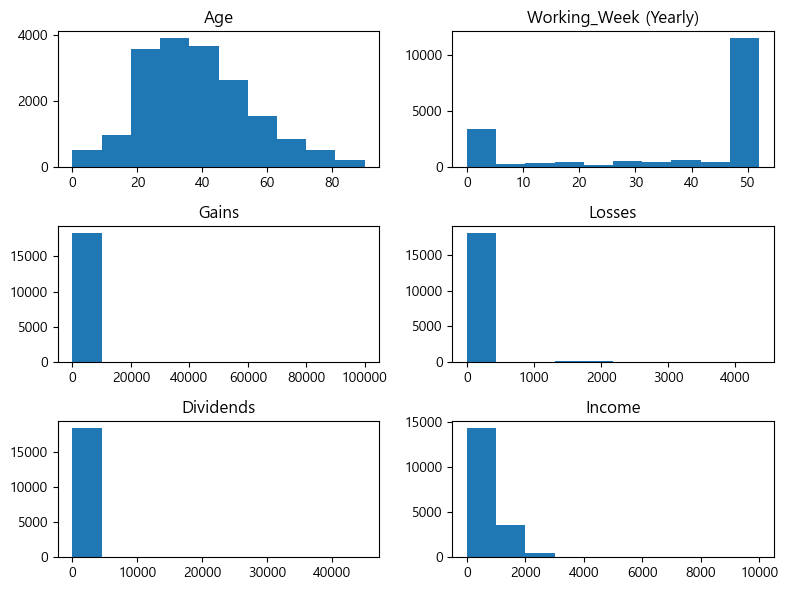

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# figure와 axes 객체 생성
fig, axes = plt.subplots(3, 2, figsize=(8, 6))
col = train.select_dtypes(include=['int', 'float']).columns

# 데이터프레임의 열을 플랫하게 만듭니다.
flat_axes = np.array(axes).flatten()

# 각각의 서브플롯에 히스토그램 그리기
for ax, column in zip(flat_axes, col):
    ax.hist(train[column])
    ax.set_title(column)

# 서브플롯 간 간격 조절
plt.tight_layout()

# 그래프 출력
plt.show()


In [8]:
train.describe(include='object')

,ID,Gender,Education_Status,Employment_Status,Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Income_Status
count,18501,18501,18501,18501,18501,18501,18501,18501,18501,18501,18501,18501,18501,18501,18501,18501,18501
unique,18501,2,17,8,24,15,5,10,7,31,8,5,43,43,43,6,3
top,TRAIN_00000,F,High graduate,Children or Armed Forces,Not in universe or children,Unknown,White,All other,Married,Householder,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),Under Median
freq,1,9687,6458,9688,3201,3201,15533,16313,9513,6076,8531,16331,16331,15098,15126,8564,12154


In [9]:
#일단 눈에 띄는 이상치 삭제 #Age 0 값 존재
train = train[train['Age'] != 0]

? Income이 0인 데이터는 삭제해도 되는 걸까? AI 역량 강화이기 때문에 이상치가 아니라 학습 데이터로 인식해서 어린아이들인 경우 소득이 0일 것이라고 예측하는 것이 현재 상황에 더 적절한 것 같다.

In [10]:
#0살을 삭제하니 나이에 1살이 있는데,어린이들이므로 넘어간다.
#최댓값이 99999
# test[test['Gains'] == test['Gains'].max()] # 99999가 18개
# test[test['Dividends'] == test['Dividends'].max()] #99999가 1개

#Gains 이상치 삭제1 : 30개 삭제
train.drop(index = train[train['Gains'] == 99999].index, inplace=True)

#Income 이상치 삭제1 : 1개 삭제
train.drop(index = train[train['Income'] == 9999].index, inplace=True)

######## test 전처리 ##############
#Gains 이상치 삭제1 
# test.drop(index = test[test['Gains'] == test['Gains'].max()].index, inplace=True)

#Dividends 이상치 삭제1
# test.drop(index = test[test['Dividends'] == test['Dividends'].max()].index, inplace=True)

In [11]:
train[train['Dividends'] == train['Dividends'].max()]
#배당금 가격이 월등히 큰 것을 제외하고는 큰 이상치가 없다고 판단하여 일시보류

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
397,TRAIN_00401,74,F,High Senior,Full-Time,48,Medical (except Hospitals),Professional,White,All other,Married,Spouse of householder,Spouse of householder,Native,US,US,US,Married Filling Jointly both over 65 (MFJ),0,0,45000,Over Median,500


In [12]:
train.describe()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
count,18414.000000,18414.000000,18414.000000,18414.000000,18414.000000,18414.000000
mean,37.859509,37.833985,253.210601,43.664766,131.538395,600.894754
std,16.630430,20.655015,1567.464186,290.698067,1241.331796,707.731468
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,24.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,52.000000,0.000000,0.000000,0.000000,515.000000
75%,48.000000,52.000000,0.000000,0.000000,0.000000,900.000000
max,90.000000,52.000000,27828.000000,4356.000000,45000.000000,9916.000000


<Axes: >

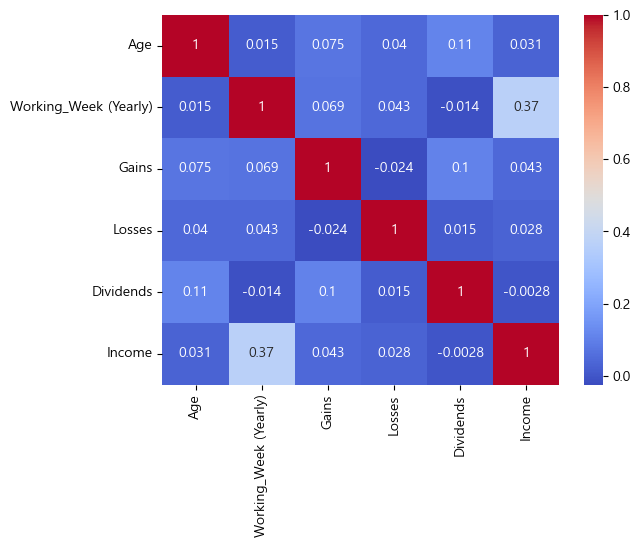

In [13]:
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

Working Week와 income이 0.42로 선형 상관관계가 있으며, 나머지는 미미한 편이다.

In [14]:
#EDA 함수

def eda_box(value): #박스플롯, 수치형
    plt.figure(figsize=(10,4))
    sns.boxplot(value, palette='Set1')
    plt.xticks(rotation=45)
    plt.show()

def eda_bar(value): #바 플롯, 범주형
    plt.figure(figsize=(10,4))
    sns.barplot(value, palette='Set1')
    plt.xticks(rotation=45)
    plt.show()   

In [15]:
#또다른 방식
# cat_cols = list(train.dtypes[train.dtypes == "object"].index)
# for c in cat_cols[1:]:
#     # if c in ['Hispanic_Origin', 'Household_Status', 'Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)']:
#     #     continue
#     plt.title(c)
#     sns.histplot(y=train[c])
#     plt.show()

In [16]:
#또다른 방식2
# selected_cols = [col for col in df_train.columns if len(df_train[col].unique()) <= 100]
# # target과의 관계를 살펴보기 위해, target을 분리하여 데이터를 분석
# train_eda = df_train[selected_cols + ['Income']].copy()

# plt.figure(figsize=(15, 100))
# for i, col in enumerate(selected_cols):
#     plt.subplot(20, 1, i+1)
#     sns.boxplot(x=col, y='Income', data=train_eda)
#     plt.xticks(rotation=15)
#     plt.tight_layout()

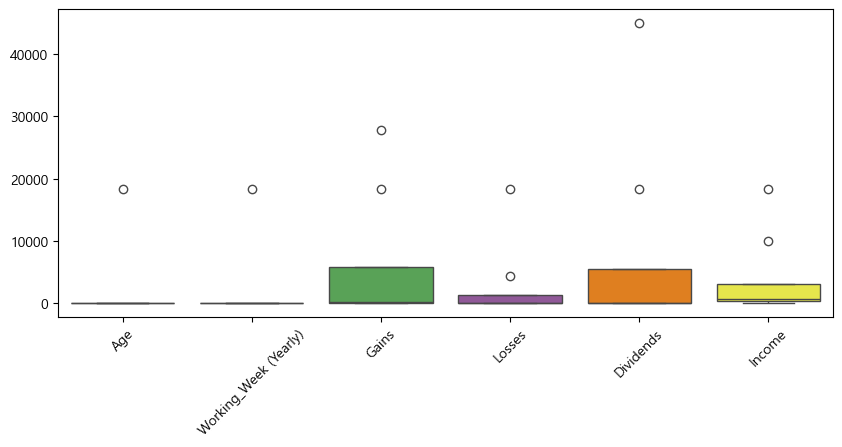

In [17]:
#수치형 describe
eda_box(train.describe())

In [18]:
train[train['Income'] == train['Income'].max()] 
#정제후 가장 높은 수입을 가진 사람이 25살 군인 아내 고졸 교통 관련 사무로 이상치가 예상됨. 
#그 다음 최대값들을 가진 행들을 살펴본다

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
4683,TRAIN_04951,40,F,Associates degree (Vocational),Children or Armed Forces,52,Education,Admin Support (include Clerical),White,Mexican (Mexicano),Married,Spouse of householder,Spouse of householder,Foreign-born (Naturalized US Citizen),Mexico,Mexico,Mexico,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,9916


### Income 관련 EDA

In [19]:
train[train['Age']<20].groupby('Age')['Income'].mean().reset_index()

#14세 이전으로는 평균이 0으로, Age < 15 데이터는 0을 삽입한다.

,Age,Income
0,1,0.000000
1,2,0.000000
2,3,0.000000
3,4,0.000000
4,5,0.000000
5,6,0.000000
6,7,0.000000
7,8,0.000000
8,9,0.000000
9,10,0.000000


In [20]:
train[train['Age']>70].groupby('Age')['Income'].mean().reset_index()

#83세 이상도 0으로 예측하게끔 한다.

,Age,Income
0,71,230.610390
1,72,249.123457
2,73,115.972222
3,74,67.761905
4,75,63.857143
5,76,126.666667
6,77,97.803922
7,78,111.800000
8,79,94.880952
9,80,21.808511


In [21]:
train.groupby('Tax_Status')['Income'].mean().reset_index()

,Tax_Status,Income
0,Head of Household (HOH),676.176132
1,Married Filling Jointly both over 65 (MFJ),209.856828
2,Married Filling Jointly both under 65 (MFJ),745.191664
3,Married Filling Jointly one over 65 & one unde...,475.654605
4,Nonfiler,99.750739
5,Single,614.974878


In [22]:
train.groupby('Martial_Status')['Income'].mean().reset_index()

,Martial_Status,Income
0,Divorced,692.557327
1,Married,690.605796
2,Married (Armed Force Spouse),920.000000
3,Married (Spouse Absent),528.070175
4,Separated,633.639080
5,Single,460.849089
6,Widowed,329.072386


In [23]:
train.groupby('Household_Summary')['Income'].mean().reset_index()

,Household_Summary,Income
0,Child 18 or older,519.203568
1,Child under 18 ever married,225.000000
2,Child under 18 never married,141.253695
3,Group Quarters- Secondary individual,409.625000
4,Householder,700.409364
5,Nonrelative of householder,542.114669
6,Other relative of householder,396.528000
7,Spouse of householder,623.719505


<Axes: xlabel='Household_Summary', ylabel='Income'>

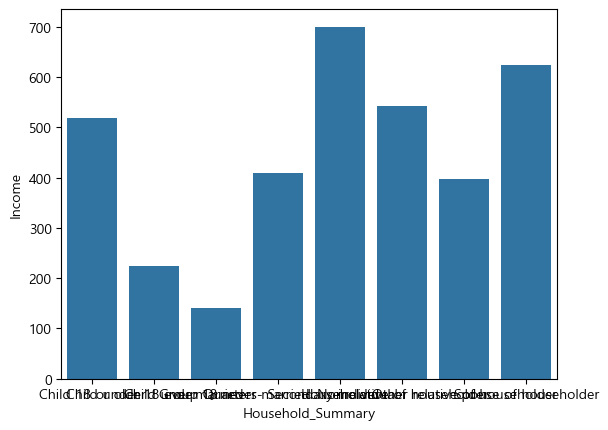

In [24]:
tem = train.groupby('Household_Summary')['Income'].mean().reset_index()
sns.barplot(data = tem, x='Household_Summary', y='Income')

In [25]:
train.groupby('Industry_Status')['Income'].mean().reset_index()

#'Not Not in universe or children', 'Armed Forces 무조건 0으로 예측

,Industry_Status,Income
0,Agriculture,434.630597
1,Armed Forces,0.000000
2,Business & Repair,646.846517
3,Communications,952.835897
4,Construction,887.155048
5,Education,616.000962
6,Entertainment,703.643885
7,Finance Insurance & Real Estate,631.700000
8,Forestry & Fisheries,592.038462
9,Hospitals,1044.008557


In [26]:
train.groupby('Employment_Status')['Income'].mean().reset_index()

#Not Working 무조건 0으로 예측

,Employment_Status,Income
0,Children or Armed Forces,563.748284
1,Choice Part-Time,794.206081
2,Full-Time,747.646737
3,Not Working,0.000000
4,Part-Time (Usually Full-Time),757.970000
5,Part-Time (Usually Part-Time),877.905063
6,Seeking Full-Time,146.595041
7,Seeking Part-Time,367.584416


In [27]:
train.groupby('Education_Status')['Income'].mean().reset_index()
#children은 무조건 0으로 예측

,Education_Status,Income
0,Associates degree (Academic),784.027961
1,Associates degree (Vocational),867.269906
2,Bachelors degree,702.287551
3,Children,0.000000
4,College,653.714929
5,Doctorate degree,454.481928
6,Elementary (1-4),343.440000
7,Elementary (5-6),320.952532
8,High Freshman,381.442561
9,High Junior,487.269704


In [28]:
train.groupby('Citizenship')['Income'].mean().reset_index()

,Citizenship,Income
0,Foreign-born (Naturalized US Citizen),665.759796
1,Foreign-born (Non-US Citizen),437.477182
2,Native,613.490554
3,Native (Born Abroad),542.421320
4,Native (Born in Puerto Rico or US Outlying),392.107692


In [29]:
train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')

In [30]:
train.groupby('Race')['Income'].mean().reset_index()

,Race,Income
0,Asian/Pacific,530.744554
1,Black,561.442953
2,Native American/Aleut/Eskimo,568.283019
3,Other,424.101045
4,White,611.849157


In [31]:
train.groupby('Tax_Status')['Income'].mean().reset_index()

,Tax_Status,Income
0,Head of Household (HOH),676.176132
1,Married Filling Jointly both over 65 (MFJ),209.856828
2,Married Filling Jointly both under 65 (MFJ),745.191664
3,Married Filling Jointly one over 65 & one unde...,475.654605
4,Nonfiler,99.750739
5,Single,614.974878


### Income Status 파악

In [32]:
#Income이 상위인데 Income Status가 under median
train['Income_Status'].value_counts()

Under Median    12112
Unknown          5588
Over Median       714
Name: Income_Status, dtype: int64

<Axes: xlabel='Income_Status', ylabel='Income'>

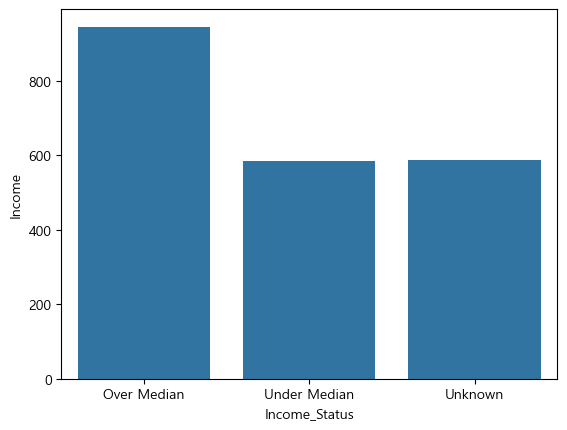

In [33]:
sns.barplot(train.groupby(['Income_Status'])['Income'].mean())

<Axes: >

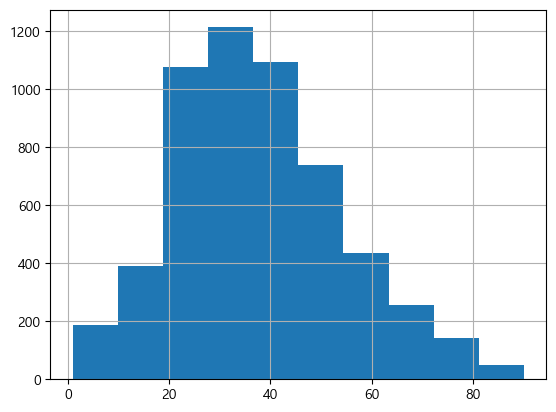

In [34]:
#소득 형태 unknown 인 사람들 특징 확인
unknown = train[train['Income_Status'] == 'Unknown']
unknown['Age'].hist()

<Axes: xlabel='count', ylabel='Gender'>

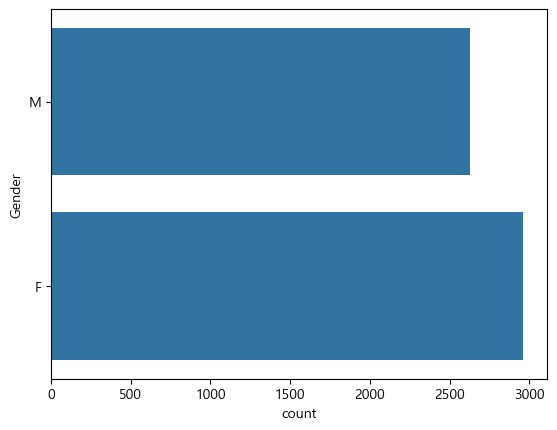

In [35]:
sns.countplot(unknown['Gender'])

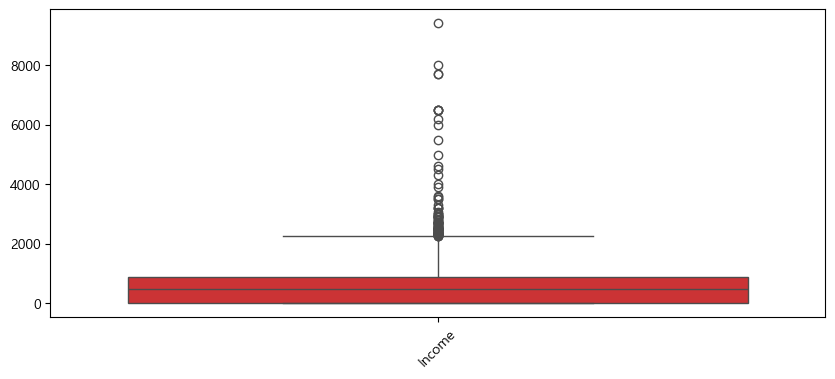

In [36]:
eda_box(unknown[['Income']])

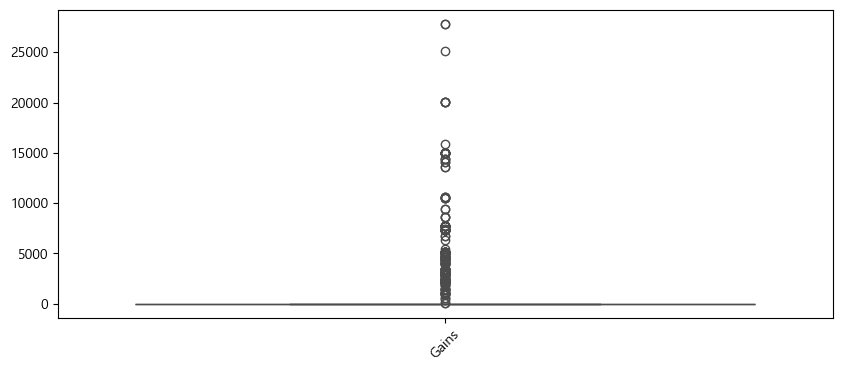

In [37]:
eda_box(unknown[['Gains']])

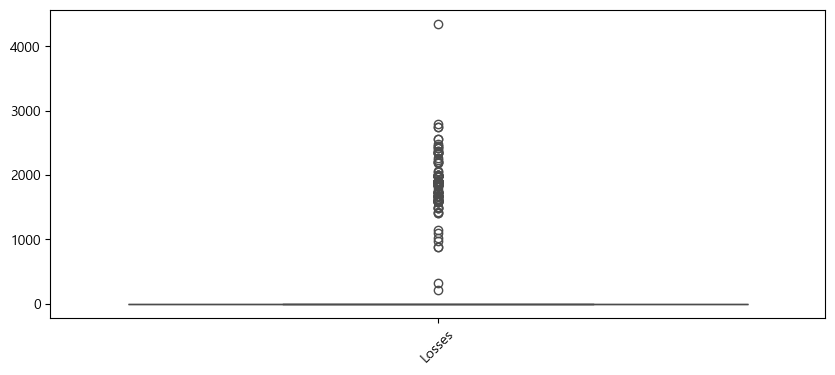

In [38]:
eda_box(unknown[['Losses']])

<Axes: >

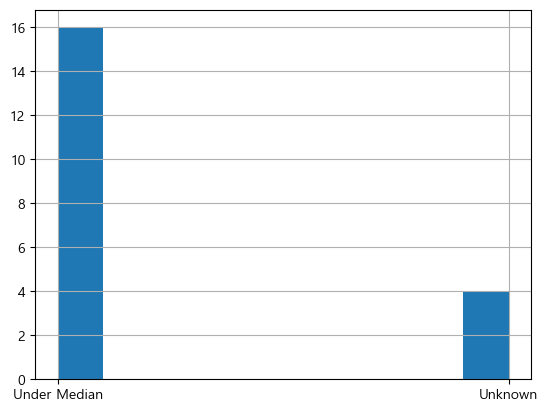

In [39]:
income_top20 = train.sort_values(by='Income', ascending=False)[:20] #위 상위 Income의 Income Status는 대부분 under median으로 이상치 의심
#top_20_income = train['Income'].nlargest(20)
income_top20['Income_Status'].hist()

### 종속변수와 상관관계를 파악하고 (상관계수 0에 수렴) income_status이기 때문에 직접적인 연관이 있을 것으로 판단 삭제 여부 고민

array([[<Axes: title={'center': 'Income'}>]], dtype=object)

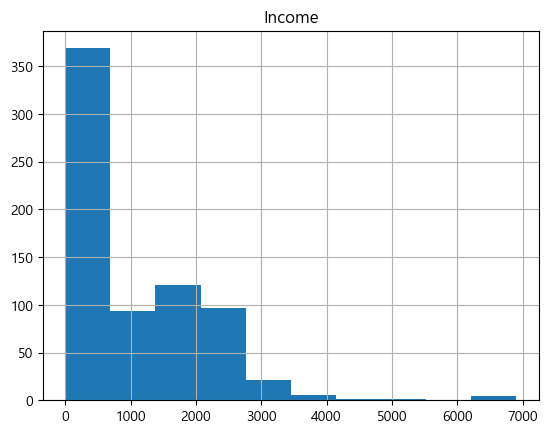

In [40]:
# pd.crosstab(train['Income_Status'], train['Income'])
income_standard = train[['Income_Status', 'Income']]

#over median의 경우
income_standard[income_standard['Income_Status'] == 'Over Median'].hist()

In [41]:

#####################################Over Median이면서 Gains와 Losses Income이 모두 0인 데이터가 가능한가? 이걸 여기서 어떻게 판단할 것인가?###################################################
# 반드시 income status와 income의 크기가 비례하는 것은 아님. 그렇다면 연관성이 얼마나 되는지 체크

train[(income_standard['Income_Status'] == 'Over Median') & (income_standard['Income'] == 0)].shape

(338, 23)

array([[<Axes: title={'center': 'Income'}>]], dtype=object)

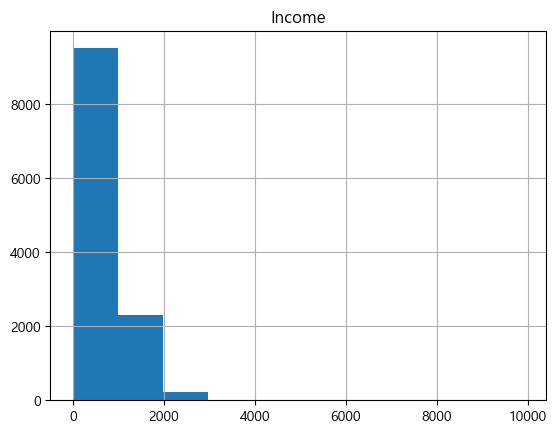

In [42]:
#under median의 경우
income_standard[income_standard['Income_Status'] == 'Under Median'].hist()

- Gains, Losses, Dividends 가 주식관련한 용어로 추측
- 따라서 주식이 없어도 Income 소득이 있을 수 있고, 소득이 없어도 주식관련 소득이 있을 것
- 그렇다면 주식 값을 하나로 만들 수 있는 파생변수가 있으면 좋겠다. (셋 다 상관관계가 거의 없음/독립적)
-

- Income이 0 인 경우를 제거하고 불균형을 맞추기 위해 log를 진행하였지만 정규분포와 많이 가까워 지지는 않음
- Unknown이 명확하지 않고 Under, Over, Unknown 모두 Income 에 비례하지 않아 **열을 삭제하는 것**으로 진행

- Gains, Losses, Dividends 가 주식관련한 용어로 추측
- 따라서 주식이 없어도 Income 소득이 있을 수 있고, 소득이 없어도 주식관련 소득이 있을 것
- 그렇다면 주식 값을 하나로 만들 수 있는 파생변수가 있으면 좋겠다. (셋 다 상관관계가 거의 없음/독립적)
- shares로 Gains - Losses + Dividends 한 파생변수를 만든다.


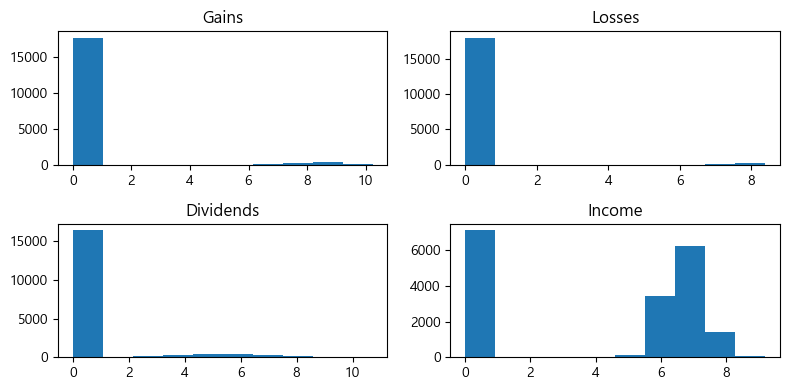

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# figure와 axes 객체 생성
fig, axes = plt.subplots(2, 2, figsize=(8, 4))
col = ['Gains', 'Losses', 'Dividends', 'Income']

# 데이터프레임의 열을 플랫하게 만듭니다.
flat_axes = np.array(axes).flatten()

# 각각의 서브플롯에 로그 변환된 히스토그램 그리기
for ax, column in zip(flat_axes, col):
    ax.hist(np.log1p(train[column]))  # 로그 변환 적용
    ax.set_title(column)

# 서브플롯 간 간격 조절
plt.tight_layout()

# 그래프 출력
plt.show()


### 소득을 예측할 때 어떤 데이터가 중요할까? (도메인 이해)

- US, Native에 속하는 사람이 대다수임을 통해 US 국가에서 이루어지는 소득 예측임을 짐작할 수 있다.
- 직업 / 교육 수준 / 경력 / 지역 / 가족 상황 / 근로시간 / 추가 소득 / 성별 / 인종 
- 너무 변수가 많아서 한 번 진행해보고 feature importance로 차원 축소를 진행

## 전처리

### 범주형 전처리

In [44]:
train = train[(train['Age'] >=15) & (train['Age'] < 83)]
train = train[train['Education_Status'] != 'Children']
train = train[train['Employment_Status'] != 'Not Working']
train = train[~train['Industry_Status'].isin(['Not in universe or children', 'Armed Forces'])]

In [45]:
test = test[(test['Age'] >=15) & (test['Age'] < 83)]
test = test[test['Education_Status'] != 'Children']
test = test[test['Employment_Status'] != 'Not Working']
test = test[~test['Industry_Status'].isin(['Not in universe or children', 'Armed Forces'])]

test_ID = test['ID']

In [46]:
print(len(train))
print(len(test))

15223
7619


In [47]:
#종속값 분리
y = train[['Income']]

train.drop(columns='Income', inplace=True)

In [48]:
#데이터셋을 합쳐서 범주형 전처리 진행
data = pd.concat([train, test], axis=0)

In [49]:
print(len(data[(data['Birth_Country'] != data['Birth_Country (Father)'])]))

print(len(data[(data['Birth_Country (Father)'] != data['Birth_Country (Mother)'])]))

print(len(data[(data['Birth_Country'] != data['Birth_Country (Mother)'])]))

1490
1178
1399


In [50]:
#직업상태 삭제
data.drop(columns='Occupation_Status', inplace=True)

#householder 삭제
data.drop(columns='Household_Status', inplace=True)
data.rename(columns={'Household_Summary': 'Household_Status'}, inplace=True)

#히스패닉 출식 삭제
data.drop(columns='Hispanic_Origin', inplace=True)

#income_status 삭제
data.drop(columns='Income_Status', inplace=True)

In [51]:
#부모 출생국가는 상관관계가 크고 본인의 출생국가보다 큰 영향을 끼치지 못한다고 판단하여 삭제
data.drop(columns='Birth_Country (Father)', inplace=True)
data.drop(columns='Birth_Country (Mother)', inplace=True)

#race 삭제
data.drop(columns='Race', inplace=True)

근무 주 카테고리화

In [52]:
# 근무 주 카테고리 화 하기
#52시간, 0 유지, 3개월 이하 1, 3개월과 6개월 사이 2, 6개월과 9개월 사이 3, 9개월 52주 전  4

def cal_months(data):
    if data == 52:
        return 5
    elif data == 0:
        return 0
    else:
        return (data // 13) + 1

data['Working_Week (Yearly)'] = data['Working_Week (Yearly)'].apply(cal_months)

In [53]:
# test_1['Working_Week (Yearly)'] = test_1['Working_Week (Yearly)'].apply(cal_months)
data['Working_Week (Yearly)'].value_counts()

5    15675
4     3011
3     1631
2     1042
1      830
0      653
Name: Working_Week (Yearly), dtype: int64

In [54]:
#Education_Status 분류
def changing_data(column, value, change_value):
    data.loc[data[column] == value, column] = change_value

#유치원 이하 : Children, Kindergarten
changing_data('Education_Status', 'Kindergarten', 'Basic')
# changing_data('Education_Status', 'Children', 'Never_edu') #0으로 예측할 예정

# 초등학교 : Elementary (1-4), Elementary (5-6)
changing_data('Education_Status', 'Elementary (1-4)', 'Basic')
changing_data('Education_Status', 'Elementary (5-6)', 'Basic')

# 중고등학교 : High graduate, High Freshman, High Junior, High Sophomore, Middle(7-8), High Senior
changing_data('Education_Status', 'High graduate', 'Basic')
changing_data('Education_Status', 'High Freshman', 'Basic')
changing_data('Education_Status', 'High Junior', 'Basic')
changing_data('Education_Status', 'High Sophomore', 'Basic')
changing_data('Education_Status', 'Middle (7-8)', 'Basic')
changing_data('Education_Status', 'High Senior', 'Basic')

# 대학교(학사, 준학사) : Bachelors degree, Associates degree(Vocational), College, Associates degree(Academic)
changing_data('Education_Status', 'Bachelors degree', 'College')
changing_data('Education_Status', 'Associates degree (Vocational)', 'College')
changing_data('Education_Status', 'Associates degree (Academic)', 'College')

# 대학원(석사, 박사, 전문학사) : Master degree, Doctorate degree, Professional degree
changing_data('Education_Status', 'Masters degree', 'Graduate')
changing_data('Education_Status', 'Doctorate degree', 'Graduate')
changing_data('Education_Status', 'Professional degree', 'Graduate')

In [55]:
#고용형태 분류

#파트타임
changing_data('Employment_Status', 'Choice Part-Time', 'Part-Time')
changing_data('Employment_Status', 'Part-Time (Usually Part-Time)', 'Part-Time')
changing_data('Employment_Status', 'Part-Time (Usually Full-Time)', 'Part-Time')

#구직 중
changing_data('Employment_Status', 'Seeking Full-Time', 'Between Jobs')
changing_data('Employment_Status', 'Seeking Part-Time', 'Between Jobs')

In [56]:
#결혼여부
data['Martial_Status'] = data['Martial_Status'].apply(lambda x: 'Married' if 'married' in x.lower() else x)
changing_data('Martial_Status', 'Divorced', 'Have been married')
changing_data('Martial_Status', 'Widowed', 'Have been married')
changing_data('Martial_Status', 'Separated', 'Have been married')

In [57]:
# #출생국가 확인 #이후 삭제로 결정해서 진행하지 않음
# #북아메리카
# changing_data('Birth_Country', 'US', 'North America')
# changing_data('Birth_Country', 'Outlying-U S (Guam USVI etc)', 'North America')
# changing_data('Birth_Country', 'Canada', 'North America')

# #중남미
# changing_data('Birth_Country', 'Cuba', 'Latin America')
# changing_data('Birth_Country', 'Mexico', 'Latin America')
# changing_data('Birth_Country', 'Puerto-Rico', 'Latin America')
# changing_data('Birth_Country', 'Columbia', 'Latin America')
# changing_data('Birth_Country', 'Trinadad&Tobago', 'Latin America')
# changing_data('Birth_Country', 'Ecuador', 'Latin America')
# changing_data('Birth_Country', 'Nicaragua', 'Latin America')
# changing_data('Birth_Country', 'Peru', 'Latin America')
# changing_data('Birth_Country', 'Jamaica', 'Latin America')
# changing_data('Birth_Country', 'Dominican-Republic', 'Latin America')
# changing_data('Birth_Country', 'Haiti', 'Latin America')
# changing_data('Birth_Country', 'Guatemala', 'Latin America')
# changing_data('Birth_Country', 'El-Salvador', 'Latin America')
# changing_data('Birth_Country', 'Panama', 'Latin America')
# changing_data('Birth_Country', 'Honduras', 'Latin America')

# #동아시아
# changing_data('Birth_Country', 'Japan', 'East Asia')
# changing_data('Birth_Country', 'South Korea', 'East Asia')
# changing_data('Birth_Country', 'China', 'East Asia')
# changing_data('Birth_Country', 'Hong Kong', 'East Asia')
# changing_data('Birth_Country', 'Taiwan', 'East Asia')

# #유럽
# changing_data('Birth_Country', 'Portugal', 'Europe')
# changing_data('Birth_Country', 'Germany', 'Europe')
# changing_data('Birth_Country', 'Italy', 'Europe')
# changing_data('Birth_Country', 'England', 'Europe')
# changing_data('Birth_Country', 'France', 'Europe')
# changing_data('Birth_Country', 'Poland', 'Europe')
# changing_data('Birth_Country', 'Scotland', 'Europe')
# changing_data('Birth_Country', 'Yugoslavia', 'Europe')
# changing_data('Birth_Country', 'Ireland', 'Europe')
# changing_data('Birth_Country', 'Greece', 'Europe')
# changing_data('Birth_Country', 'Hungary', 'Europe')
# changing_data('Birth_Country', 'Holand-Netherlands', 'Europe')

# #남아시아 & 중동
# changing_data('Birth_Country', 'Philippines', 'South&Middle Asia')
# changing_data('Birth_Country', 'India', 'South&Middle Asia')
# changing_data('Birth_Country', 'Vietnam', 'South&Middle Asia')
# changing_data('Birth_Country', 'Cambodia', 'South&Middle Asia')
# changing_data('Birth_Country', 'Laos', 'South&Middle Asia')
# changing_data('Birth_Country', 'Thailand', 'South&Middle Asia')
# changing_data('Birth_Country', 'Iran', 'South&Middle Asia')

In [58]:
#성별 대체
data['Gender'] = data['Gender'].replace({'M' : 0, 'F' : 1})

In [59]:
#학력 범주형 전환
data['Education_Status'] = data['Education_Status'].replace({'Basic' : 0, 'College' : 1, 'Middle-Graduate' : 2})

In [60]:
#고용형태 범주형 전환
data['Employment_Status'] = data['Employment_Status'].replace({'Between Jobs' : 0, 'Part-Time' : 1, 'Full-Time' : 2})

In [61]:
# #파생변수 만들기
# #working week가 1년 기준이고, 미국은 주로 배당금이 분기별로 나와서 1년이면 4번 나옴
# data['Shares'] = data['Gains'] - data['Losses'] + data['Dividends']*4  

#기존 gains, losses, dividends 삭제
# data.drop(columns=['Gains', 'Losses', 'Dividends'], inplace=True)


파생변수가 너무 단순한가보다. Gains, losses, dividends를 없애든, 파생변수를 만들지 않고 살리든, 배수를 곱하든 결과는 동일
그럼 파생변수를 더 바꿔야할까 아니면 뭘 더 없애야 할까?
없애는 게 마냥 답은 아닌 것 같은데 말이지 


0인 데이터가 훨씬 많으므로 0과 0이 아닌 것으로 구분해보자

In [62]:
data['Gains'] = np.where(data['Gains']>0, 1, 0)
data['Losses']= np.where(data['Losses']>0, 1, 0)
data['Dividends']= np.where(data['Dividends']>0, 1, 0)


In [63]:
def or_citizenship(value):
    if 'Native' in value:
        return 1
    elif 'Foreign-born' in value:
        return 0

data['Citizenship'] = data['Citizenship'].map(or_citizenship)

In [64]:
#birth_country와 Industry_Status 삭제
data.drop(columns=['Industry_Status', 'Birth_Country'],inplace=True)

In [65]:
#세금과 결혼상태 상관계수가 0.76으로 높아서 삭제
data.drop(columns='Martial_Status', inplace=True)

In [66]:
train.shape, test.shape

((15223, 22), (7619, 22))

In [67]:
train_en = data.iloc[:15223]
test_en = data.iloc[15223:]

In [68]:
train_en.drop(columns='ID', inplace=True)
test_en.drop(columns='ID', inplace=True)

C:\Users\sori4\AppData\Local\Temp\ipykernel_25588\2118149457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_en.drop(columns='ID', inplace=True)
C:\Users\sori4\AppData\Local\Temp\ipykernel_25588\2118149457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_en.drop(columns='ID', inplace=True)


In [69]:
#나머지 Target Encoding
from category_encoders.target_encoder import TargetEncoder

object_col = train_en.select_dtypes(include='object').columns

for i in object_col:
    encoder = TargetEncoder()
    train_en.loc[:, i] = encoder.fit_transform(train_en[i], y['Income'])
    test_en.loc[: ,i] = encoder.transform(test_en[i])

C:\Users\sori4\AppData\Local\Temp\ipykernel_25588\1813497299.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_en.loc[:, i] = encoder.fit_transform(train_en[i], y['Income'])
C:\Users\sori4\AppData\Local\Temp\ipykernel_25588\1813497299.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_en.loc[: ,i] = encoder.transform(test_en[i])
C:\Users\sori4\AppData\Local\Temp\ipykernel_25588\1813497299.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [70]:
train_en

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Household_Status,Citizenship,Tax_Status,Gains,Losses,Dividends
0,63,0,693.154211,747.730248,1,806.942493,1,414.228070,0,0,0
1,37,0,773.387137,747.730248,5,806.942493,1,660.706431,0,0,0
2,58,1,693.154211,747.730248,5,806.942493,1,796.780421,1,0,0
3,44,0,693.154211,747.730248,5,806.942493,1,660.706431,0,0,0
4,37,1,693.154211,747.730248,5,806.942493,1,697.414261,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18495,41,0,693.154211,747.730248,5,806.942493,1,660.706431,0,0,0
18496,33,0,693.154211,711.095207,5,806.942493,1,660.706431,0,0,0
18497,20,1,773.387137,747.730248,1,569.417169,1,414.228070,0,0,0
18498,22,0,773.387137,711.095207,5,608.960574,1,660.706431,0,0,0


In [71]:
#전처리 다한 데이터 내보내기
train_en.to_csv("./train_data.csv")
test_en.to_csv("./test_data.csv")
y.to_csv("./y_data.csv")

### 스케일링

In [72]:
#standard scaler
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# scaler.fit(train_en)
# train_scaled = scaler.transform(train_en)
# test_scaled = scaler.transform(test_en)

In [73]:
# train_scaled

### 데이터분리

In [74]:
from sklearn.model_selection import train_test_split

xtr, xval, ytr, yval = train_test_split(train_en, y, test_size=0.2, random_state=123)

xtr.shape, xval.shape, ytr.shape, yval.shape

((12178, 11), (3045, 11), (12178, 1), (3045, 1))

### 회귀모델 진행

In [75]:
#optuna로 베스트 pamrasm 찾기
#1. 최적화 하려는 목적함수 정의, 하이퍼파라미터를 인자로 받고 최적화할 지표 반환
#2. study라는 객체 생성, 하이퍼파라미터 관리
#3. trial : 새로운 하이퍼파라미터 조합시도, optimize 메서드를 호출할 때마다 생성
#4. optimize로 목적합수 최적화
#5. 최적화후 study 객체로 최적 하이퍼파라미터와 값 확인 가능능

In [76]:
import optuna
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [77]:
#하이퍼파라미터 지정 후 모델 학습, 교차 검증을 통해 평가 지표 계산하고 반환
def objective(trial):
    
    params = {'random_state' : 42,
              'verbosity' : -1,
              'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.1),
              'n_estimators' : trial.suggest_int('n_estimators', 50, 150),
              'objective' : 'regression',
              'metric' : 'rmse',
              "max_depth": trial.suggest_int("max_depth", 1, 20),
              'min_child_samples' : trial.suggest_int('min_child_samples', 5, 100),
              'subsample': trial.suggest_float("subsample", 0.3, 1.0),
              'colsample_bytree': trial.suggest_float("colsample_bytree", 0.4, 1.0),
              'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.1, 100),
              'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.1, 100)
              }

    lgbm = LGBMRegressor(**params)

    score = cross_val_score(lgbm, xtr, ytr, cv=3, scoring='neg_mean_squared_error').mean()
    return score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100) #최적화 실행

# 최적의 하이퍼파라미터 및 값 확인
best_params = study.best_params
best_value = study.best_value

[I 2024-04-16 14:44:47,773] A new study created in memory with name: no-name-4cfff01f-efb5-4585-a85a-343802f9e4b6
C:\Users\sori4\AppData\Local\Temp\ipykernel_25588\66659456.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\sori4\AppData\Local\Temp\ipykernel_25588\66659456.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.1, 100),
C:\Users\sori4\AppData\Local\Temp\ipykernel_25588\66659456.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

In [78]:
best_params

{'learning_rate': 0.010534933330046799,
 'n_estimators': 58,
 'max_depth': 1,
 'min_child_samples': 66,
 'subsample': 0.6868619216932553,
 'colsample_bytree': 0.4000830395049858,
 'reg_alpha': 10.861062264328988,
 'reg_lambda': 0.4527085193892282}

In [79]:
best_value

-524160.8049708098

In [80]:
best_lgbm = LGBMRegressor(**best_params)
best_lgbm.fit(xtr, ytr)
y_pred = best_lgbm.predict(xval)

rmse = mean_squared_error(yval, y_pred) ** 0.5
print("Root Mean Squared Error:", rmse)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 107
[LightGBM] [Info] Number of data points in the train set: 12178, number of used features: 11
[LightGBM] [Info] Start training from score 729.447118
Root Mean Squared Error: 665.1445222562935


### 기타 모델링

In [ ]:
#결정트리 DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

dt = DecisionTreeRegressor(random_state=123)
dt.fit(xtr, ytr)
yval_pred_dt = dt.predict(xval)

print("결정트리 예측모델")
print("RMSE", np.sqrt(mean_squared_error(yval, yval_pred_dt)))
print("R2", r2_score(yval, yval_pred_dt))

결정트리 예측모델
RMSE 907.7532675847041
R2 -0.8344068772597304


In [ ]:
feature_importance_df = pd.DataFrame({'Feature': train_en.columns, 'Importance': dt.feature_importances_})
feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df['cumsum'] = feature_importance_df['Importance'].cumsum()
feature_importance_df

,Feature,Importance,cumsum
0,Age,0.414667,0.414667
1,Gender,0.018021,0.432688
2,Education_Status,0.063362,0.496049
3,Employment_Status,0.103492,0.599541
4,Working_Week (Yearly),0.097136,0.696677
5,Household_Status,0.082522,0.779199
6,Citizenship,0.026512,0.805711
7,Tax_Status,0.089680,0.895390
8,Gains,0.032934,0.928325
9,Losses,0.025527,0.953852


In [ ]:
#랜덤포레스트 RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(random_state=123)
rf.fit(xtr, ytr)
yval_pred_rf = rf.predict(xval)

print("랜덤포레스트 예측모델")
print("RMSE", np.sqrt(mean_squared_error(yval, yval_pred_rf)))
print("R2", r2_score(yval, yval_pred_rf))

c:\Users\sori4\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


랜덤포레스트 예측모델
RMSE 747.7656719107185
R2 -0.24477562628024652


In [ ]:
import xgboost

xgb = xgboost.XGBRegressor()
xgb.fit(xtr, ytr)
yval_pred_xgb = xgb.predict(xval)

print("XGBoost 예측모델")
print("RMSE", np.sqrt(mean_squared_error(yval, yval_pred_xgb)))
print("R2", r2_score(yval, yval_pred_xgb))

XGBoost 예측모델
RMSE 691.4668775134226
R2 -0.06439491491511884


In [ ]:
n_estimators = xgb.n_estimators
max_depth = xgb.max_depth

print("n_estimators:", n_estimators) #트리갯수
print("max_depth:", max_depth) #최대깊이


n_estimators: None
max_depth: None


In [ ]:
params = xgb.get_params()
print("Parameters:", params)


Parameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


차원을 축소한 것(열 축소) 크게 도움이 되지 않았음. 모델 성능을 제한해야할까?

In [ ]:
from sklearn.model_selection import GridSearchCV

# 탐색할 매개변수 그리드 설정
param_grid = {
    'max_depth': [2,3,4],
    'n_estimators': [10,12,15]
}

# XGBoost 모델 생성
xgb = xgboost.XGBRegressor()

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# GridSearchCV를 사용하여 모델 훈련
grid_search.fit(xtr, ytr)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", grid_search.best_params_)

# 최적의 모델
best_model = grid_search.best_estimator_

# 최적의 모델로 예측 수행
yval_pred_xgb = best_model.predict(xval)

# 성능 평가
print("XGBoost 예측모델")
print("RMSE", np.sqrt(mean_squared_error(yval, yval_pred_xgb)))
print("R2", r2_score(yval, yval_pred_xgb))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'max_depth': 3, 'n_estimators': 15}
XGBoost 예측모델
RMSE 652.1992421127602
R2 0.05306404331635728


In [ ]:
###최종
xgb = xgboost.XGBRegressor(max_depth = 3, n_estimators=12)
xgb.fit(xtr, ytr)
yval_pred_xgb = xgb.predict(xval)

print("XGBoost 예측모델")
print("RMSE", np.sqrt(mean_squared_error(yval, yval_pred_xgb)))
print("R2", r2_score(yval, yval_pred_xgb))

XGBoost 예측모델
RMSE 652.2594044527567
R2 0.05288933440256138


### 뽑아내기

In [82]:
### 뽑아내기

test_income_predictoin = best_lgbm.predict(test_en)
test_income_predictoin

array([663.75137511, 731.0333862 , 740.80515483, ..., 757.66272658,
       656.665572  , 757.66272658])

In [83]:
len(test_income_predictoin)

7619

In [84]:
test_income_predictoin

array([663.75137511, 731.0333862 , 740.80515483, ..., 757.66272658,
       656.665572  , 757.66272658])

In [85]:
submission.loc[submission['ID'].isin(test_ID), 'Income'] = test_income_predictoin

In [86]:
result = pd.concat([test_copy, submission[['Income']]], axis=1)

result.loc[result['Employment_Status'] == 'Seeking Full-Time', 'Income'] = 0
result.loc[(result['Age'] >= 83) & (result['Age'] < 90), 'Income'] = 0

In [87]:
submission['Income'] = result['Income']

In [88]:
submission

,ID,Income
0,TEST_0000,0.000000
1,TEST_0001,0.000000
2,TEST_0002,663.751375
3,TEST_0003,731.033386
4,TEST_0004,0.000000
...,...,...
9995,TEST_9995,752.126783
9996,TEST_9996,757.662727
9997,TEST_9997,656.665572
9998,TEST_9998,0.000000


In [89]:
submission.to_csv("./submission.csv", index=False)